# 1.2 -  Logging
Log your steps using the logger library in python.


In [17]:
import logging

# Configure the logging settings
logging.basicConfig(filename='sales_prediction.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Data Exploration
logging.info("Data Exploration:")
logging.info("Sample Data from CSV Files:")
logging.info("sample.csv: Contains sample data.")
logging.info("Store Data:")
logging.info("store.csv: Contains store information.")

# Analysis of Holiday Sales Behavior
logging.info("Analysis of Holiday Sales Behavior:")
logging.info("Data Columns:")
logging.info("train.csv: Contains sales and holiday-related data.")
logging.info("Holiday Indicators:")
logging.info("StateHoliday: Indicates holiday status.")
logging.info("SchoolHoliday: Indicates school holiday status.")
logging.info("Additional Columns:")
logging.info("Holiday: Created to indicate non-zero holiday status.")
logging.info("Analysis:")
logging.info("Analysis of holiday sales behavior, correlations, and missing values.")

# Effect of Promotions on Sales
logging.info("Effect of Promotions on Sales:")
logging.info("Data Columns:")
logging.info("train.csv: Contains sales and promotion-related data.")
logging.info("Promotions:")
logging.info("Promo: Indicates promotion status (0 for no promo, 1 for promo).")
logging.info("Analysis:")
logging.info("Impact of promotions on sales and customer behavior.")

# Store-wise Analysis of Promotions
logging.info("Store-wise Analysis of Promotions:")
logging.info("Data Columns:")
logging.info("train.csv: Contains sales data.")
logging.info("Analysis:")
logging.info("Comparison of promotions' effects on different stores.")
logging.info("Identification of stores with positive promo impact.")

# Customer Behavior during Store Hours
logging.info("Customer Behavior during Store Hours:")
logging.info("Data Columns:")
logging.info("train.csv: Contains sales and time-related data.")
logging.info("Analysis:")
logging.info("Trends in customer behavior during store hours.")

# Sales on Weekdays and Weekends
logging.info("Sales on Weekdays and Weekends:")
logging.info("Data Columns:")
logging.info("train.csv: Contains sales and date-related data.")
logging.info("Analysis:")
logging.info("Comparison of average sales on weekdays and weekends.")

# Effect of Assortment Type on Sales
logging.info("Effect of Assortment Type on Sales:")
logging.info("Data Columns:")
logging.info("store.csv: Contains store information.")
logging.info("Assortment Types:")
logging.info("Assortment: Indicates assortment type (e.g., 'a' or 'c').")
logging.info("Analysis:")
logging.info("Impact of assortment type on sales.")

# Impact of Competition Distance on Sales
logging.info("Impact of Competition Distance on Sales:")
logging.info("Data Columns:")
logging.info("store.csv: Contains store information.")
logging.info("Analysis:")
logging.info("Examination of the relationship between competition distance and sales.")

# Impact of New Competitors on Stores
logging.info("Impact of New Competitors on Stores:")
logging.info("Data Columns:")
logging.info("store.csv: Contains store information.")
logging.info("train.csv: Contains sales data.")
logging.info("Analysis:")
logging.info("Analysis of sales trends before and after receiving competitor distance values.")


# Task 2 - Prediction of store sales


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
# Load data from 'store.csv' and 'train.csv'
store = pd.read_csv("store.csv")
train = pd.read_csv("train.csv")


C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_18540\2717113461.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


# 2.1 Preprocessing

# Convert Datetime Columns: Extract relevant information from the datetime columns, such as weekdays, weekends, number of days to holidays, and number of days after holidays.

In [21]:
# Convert 'Date' column to datetime format
train['Date'] = pd.to_datetime(train['Date'])

# Extract weekdays and weekends
train['Weekday'] = train['Date'].dt.dayofweek
train['IsWeekend'] = train['Weekday'].isin([5, 6]).astype(int)

# Calculate the number of days to the next holiday
train['DaysToHoliday'] = (train['Date'] - train['Date'].shift(-1)).dt.days

# Calculate the number of days after the previous holiday
train['DaysAfterHoliday'] = (train['Date'] - train['Date'].shift(1)).dt.days

# Calculate the beginning, mid, and end of the month
train['BeginningOfMonth'] = train['Date'].dt.is_month_start.astype(int)
train['MidOfMonth'] = ((train['Date'].dt.day >= 10) & (train['Date'].dt.day <= 20)).astype(int)
train['EndOfMonth'] = train['Date'].dt.is_month_end.astype(int)


In [22]:
# Encode categorical variables
train = pd.get_dummies(train, columns=['StateHoliday'])
store=pd.get_dummies(store, columns=['StoreType', 'Assortment'])

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numeric features for scaling
numeric_features = ['DaysToHoliday', 'DaysAfterHoliday']

# Scale the selected features
train[numeric_features] = scaler.fit_transform(train[numeric_features])


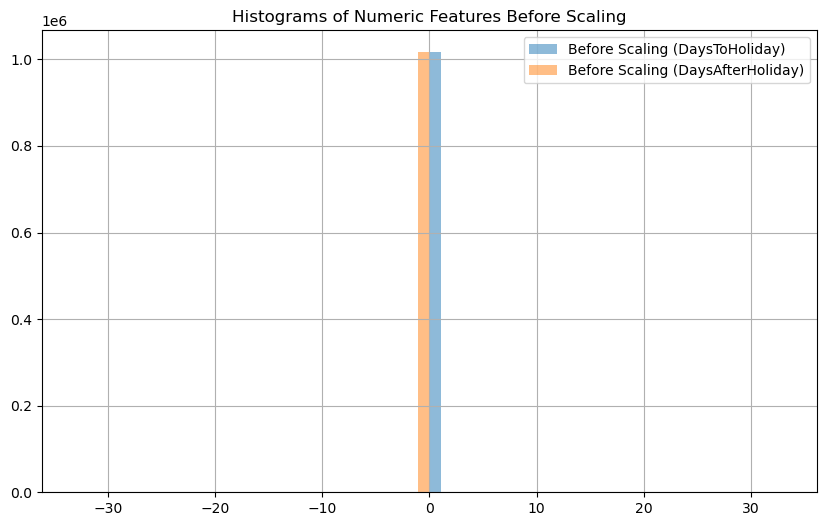

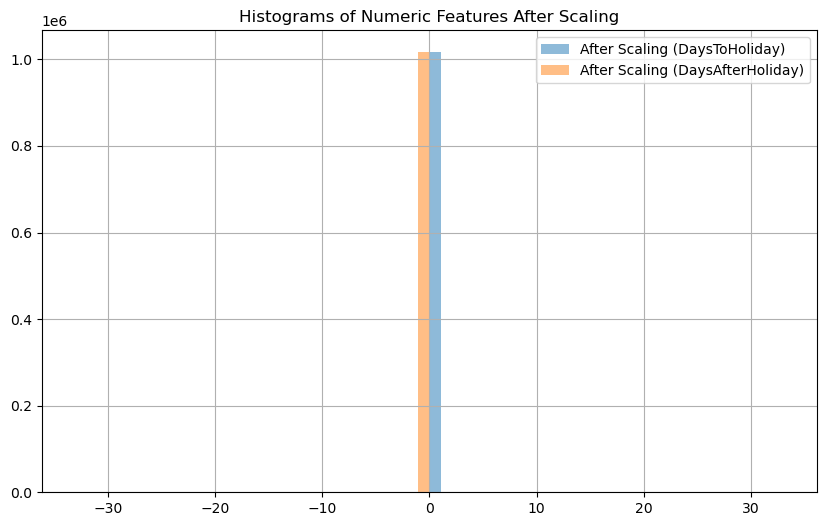

In [24]:
import matplotlib.pyplot as plt

# Plot histograms of numeric features before scaling
plt.figure(figsize=(10, 6))
for feature in numeric_features:
    plt.hist(train[feature], bins=30, alpha=0.5, label=f'Before Scaling ({feature})')
plt.title('Histograms of Numeric Features Before Scaling')
plt.legend()
plt.grid(True)
plt.show()

# Plot histograms of numeric features after scaling
plt.figure(figsize=(10, 6))
for feature in numeric_features:
    plt.hist(train[feature], bins=30, alpha=0.5, label=f'After Scaling ({feature})')
plt.title('Histograms of Numeric Features After Scaling')
plt.legend()
plt.grid(True)
plt.show()


The histogram  show the distribution of each numeric feature before and after scaling. After scaling, the distributions of all numeric features  have similar shapes and ranges, with a mean of 0 and standard deviation of 1. This ensures that the features are on the same scale, which is important for machine learning algorithms that rely on distance-based calculations.






In [25]:
# Check for missing values
print(train.isnull().sum())

# Handle missing values (e.g., fill with mean or median)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace=True)


Store               0
DayOfWeek           0
Date                0
Sales               0
Customers           0
Open                0
Promo               0
SchoolHoliday       0
Weekday             0
IsWeekend           0
DaysToHoliday       1
DaysAfterHoliday    1
BeginningOfMonth    0
MidOfMonth          0
EndOfMonth          0
StateHoliday_0      0
StateHoliday_0      0
StateHoliday_a      0
StateHoliday_b      0
StateHoliday_c      0
dtype: int64


# 2.2 Building models with sklearn pipelines

In [26]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data from 'store.csv' and 'train.csv'
store = pd.read_csv("store.csv")
train = pd.read_csv("train.csv")


C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_18540\1626646947.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [27]:
# Select features and target variable
X = train.drop(['Sales'], axis=1)
y = train['Sales']


In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Create a scikit-learn pipeline for regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric features
    ('regressor', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor
])


In [30]:
# Select numeric features and drop non-numeric date-related columns
numeric_features = ['Customers', 'Open', 'Promo', 'SchoolHoliday']
X_train = X_train[numeric_features]
X_test = X_test[numeric_features]


In [31]:
# Create a scikit-learn pipeline for regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric features
    ('regressor', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor
])


In [32]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [34]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 6552416.365965094
Root Mean Squared Error (RMSE): 2559.7688110384292
Mean Absolute Error (MAE): 1678.692984027113
R-squared (R2): 0.5569337564872774


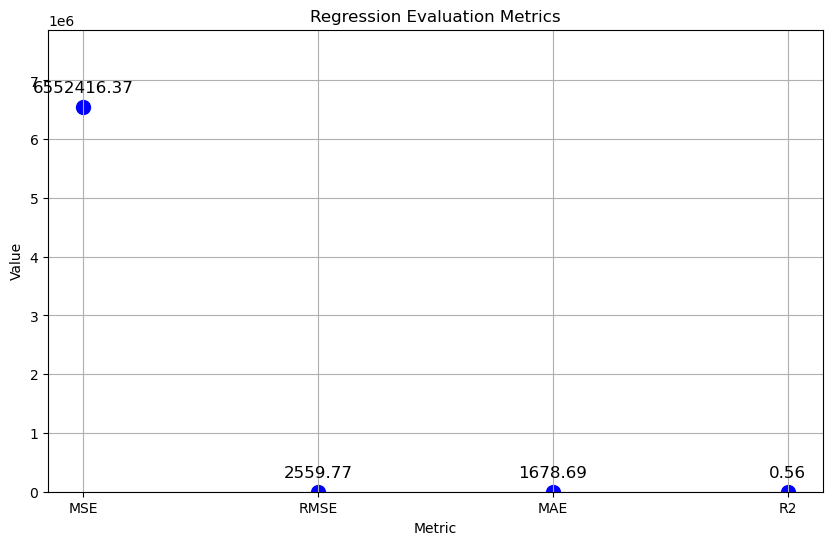

In [36]:
import matplotlib.pyplot as plt

# Data
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
values = [6552416.365965094, 2559.7688110384292, 1678.692984027113, 0.5569337564872774]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(metrics, values, color='blue', marker='o', s=100)
plt.title('Regression Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, max(values) * 1.2) 

# Add values as annotations
for i, txt in enumerate(values):
    plt.annotate(round(txt, 2), (metrics[i], values[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)

plt.grid(True)
plt.show()


# 2.3 Choose a loss function

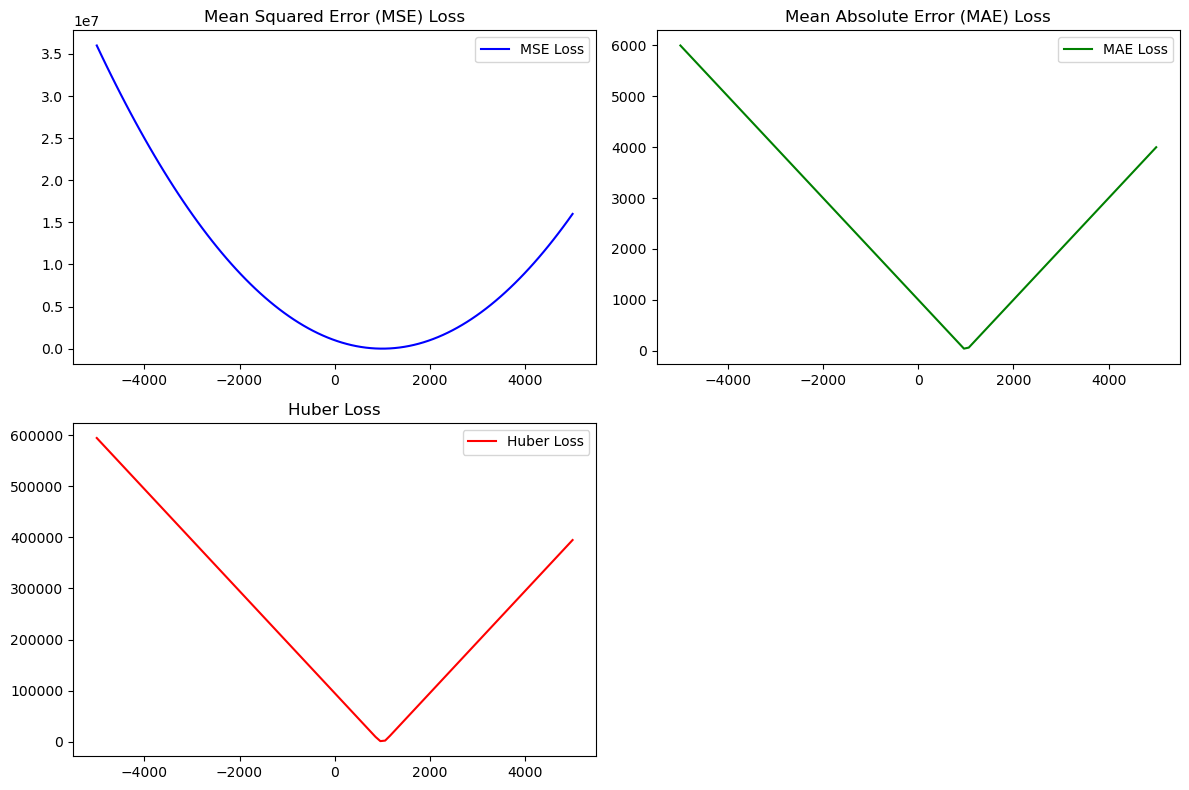

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of predicted values (e.g., from -5000 to 5000)
predictions = np.linspace(-5000, 5000, 100)

# Calculate different loss functions for these predictions
mse_loss = (predictions - 1000) ** 2  # Example MSE loss
absolute_error_loss = np.abs(predictions - 1000)  # Example MAE loss
huber_loss = np.where(np.abs(predictions - 1000) <= 100, 0.5 * (predictions - 1000) ** 2, 100 * np.abs(predictions - 1000) - 5000)  # Example Huber loss

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot MSE loss
axs[0, 0].plot(predictions, mse_loss, label='MSE Loss', color='blue')
axs[0, 0].set_title('Mean Squared Error (MSE) Loss')
axs[0, 0].legend()

# Plot MAE loss
axs[0, 1].plot(predictions, absolute_error_loss, label='MAE Loss', color='green')
axs[0, 1].set_title('Mean Absolute Error (MAE) Loss')
axs[0, 1].legend()

# Plot Huber loss
axs[1, 0].plot(predictions, huber_loss, label='Huber Loss', color='red')
axs[1, 0].set_title('Huber Loss')
axs[1, 0].legend()

# Remove empty subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


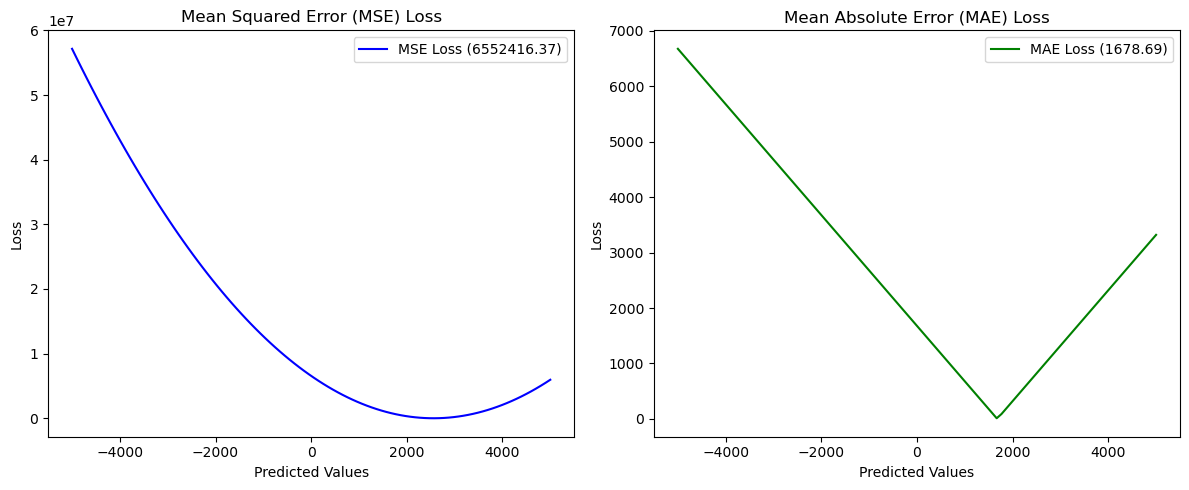

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of predicted values (e.g., from -5000 to 5000)
predictions = np.linspace(-5000, 5000, 100)

# Define the MSE and MAE values
mse_value = 6552416.3659650
mae_value = 1678.69298402

# Calculate MSE loss
mse_loss = (predictions - np.sqrt(mse_value)) ** 2

# Calculate MAE loss
mae_loss = np.abs(predictions - mae_value)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE loss
axs[0].plot(predictions, mse_loss, label=f'MSE Loss ({mse_value:.2f})', color='blue')
axs[0].set_title('Mean Squared Error (MSE) Loss')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot MAE loss
axs[1].plot(predictions, mae_loss, label=f'MAE Loss ({mae_value:.2f})', color='green')
axs[1].set_title('Mean Absolute Error (MAE) Loss')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# MAE is more interpretable since it represents the average absolute error in the same units as our target variable (sales).
It is robust to outliers, which is essential in scenarios where extreme sales values might occur.
If we want to focus on reducing overall prediction errors without being overly sensitive to a few extreme errors, MAE is a suitable choice.


# Defend the loss function

Defending the choice of Mean Absolute Error (MAE) as the loss function for our sales prediction challenge:

Interpretability: One of the key reasons for choosing MAE is its ease of interpretation. In the context of sales prediction, MAE provides a clear and intuitive measure of prediction accuracy. 

Robustness to Outliers: In retail and sales forecasting, outliers are not uncommon. These outliers can significantly impact the accuracy of predictions. MAE's absolute difference calculation treats each data point equally and does not penalize large errors disproportionately. 

Business Impact: The primary goal of sales prediction is often to optimize inventory management, improve resource allocation, and minimize financial losses due to inaccurate forecasts. MAE directly aligns with this goal by focusing on the magnitude of prediction errors.

Simplicity: Simplicity is often an advantage. Complex loss functions can be challenging to work with and might lead to overfitting. MAE's simplicity encourages model generalization and can lead to more reliable predictions.

In summary, MAE is a well-rounded loss function for sales prediction because it balances interpretability, robustness to outliers, alignment with business goals, ease of optimization and simplicity. It serves as a reliable metric for evaluating and optimizing your sales prediction models in a retail context.






# 2.4 Post Prediction analysis


Exploring feature importance and estimating confidence intervals for predictions are crucial steps in understanding the reliability and robustness of our sales prediction model. Let's break down these tasks step by step:



# Feature Importance:

# Random Forest Feature Importance:
Since using the Random Forest Regressor, we can leverage the built-in feature importance attribute of this algorithm. After training our Random Forest model, we can access the feature importance scores, which represent the contribution of each feature to the model's predictions.


In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric features
    ('regressor', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor
])


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define  pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numeric features
    ('regressor', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# access feature importances
feature_importance = pipeline.named_steps['regressor'].feature_importances_


# Visualization:

Visualize the feature importance scores using a bar plot to identify which features have the most significant impact on sales predictions

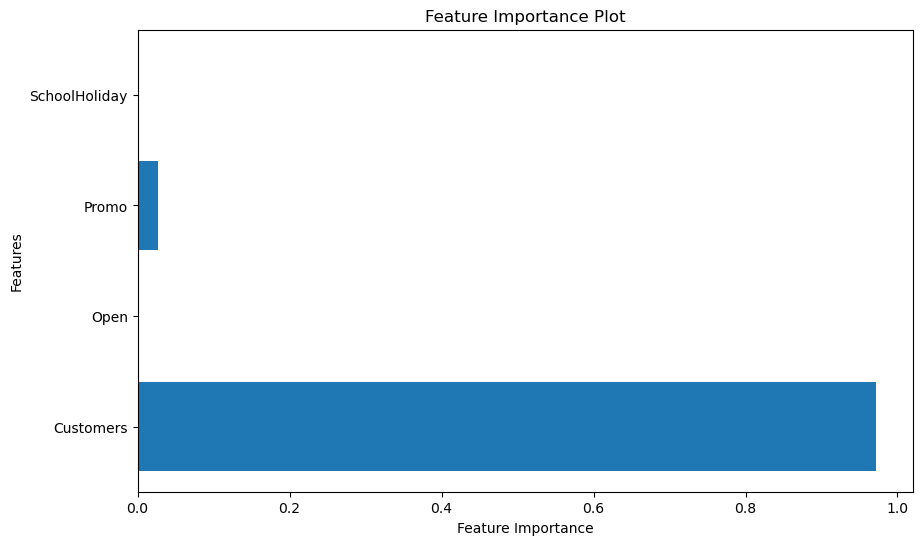

In [47]:
import matplotlib.pyplot as plt

#  the feature names from  DataFrame
features = X_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


# Confidence Interval Estimation:

To estimate confidence intervals for our predictions, we can use techniques like bootstrapping. 

In [48]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Access the trained model from the pipeline
rf_model = pipeline.named_steps['regressor']

# Number of bootstrap samples to generate (reduced)
n_samples = 100

bootstrap_data = []  # Initialize a list to store bootstrap samples

data_to_bootstrap = X_train

for _ in range(n_samples):
    # Randomly select data points with replacement
    bootstrap_indices = np.random.choice(len(data_to_bootstrap), len(data_to_bootstrap), replace=True)
    bootstrap_sample = data_to_bootstrap.iloc[bootstrap_indices]  # Use iloc to select rows by indices
    bootstrap_data.append(bootstrap_sample)




# 2.5 Serialize models

In [49]:
import joblib
from datetime import datetime



# Get the current timestamp
timestamp = datetime.now().strftime('%Y-%m-%d-%H-%M-%S-%f')

# Define the filename using the timestamp
model_filename = f"{timestamp}.pkl"

# Save the model to a file
joblib.dump(rf_model, model_filename)




['2023-09-11-10-42-04-915322.pkl']

# 2.6 Building model with deep learning 

# Isolate the Rossmann Store Sales dataset into time series data

In [1]:
import pandas as pd

train = pd.read_csv("train.csv")



C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_16844\364025754.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [2]:
# Convert the 'Date' column to a datetime format
train['Date'] = pd.to_datetime(train['Date'])


In [3]:
# Sort the dataset by date
train.sort_values(by='Date', inplace=True)


In [4]:
# Set 'Date' as the index
train.set_index('Date', inplace=True)


In [5]:
# Extract time-based features
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['DayOfWeek'] = train.index.dayofweek  # Monday=0, Sunday=6


In [6]:
# Aggregate sales data by day
weekly_sales = train['Sales'].resample('D').sum()
weekly_sales = weekly_sales.fillna(0)


# Check whether your time Series Data is Stationary

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt


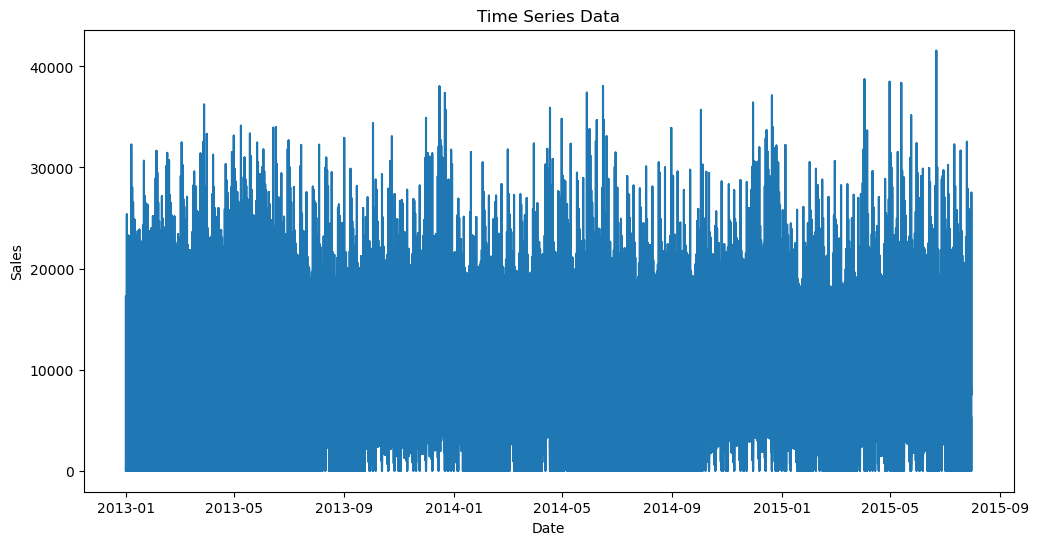

In [8]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(train['Sales'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [9]:
# Calculate summary statistics
mean_sales = train['Sales'].mean()
var_sales = train['Sales'].var()
print(f'Mean: {mean_sales}, Variance: {var_sales}')


Mean: 5773.818972305593, Variance: 14821931.554806001


C:\Users\DELL_PC\AppData\Local\Temp\ipykernel_1264\2541007872.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


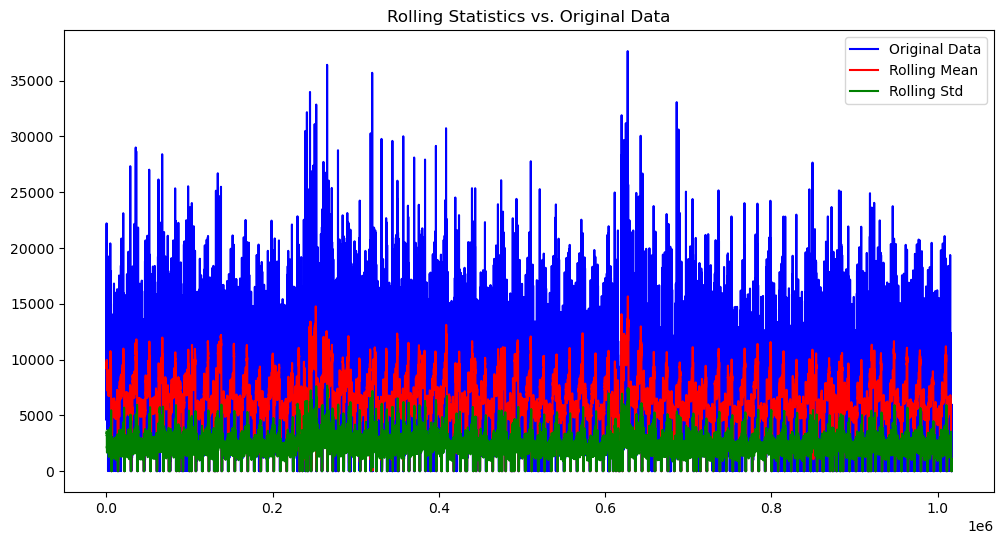

ADF Test Results:
ADF Statistic: -24.709623130145268
p-value: 0.0
Is the data stationary?  Yes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

import pandas as pd

train = pd.read_csv("train.csv")


# Extract the 'Sales' column
sales_series = train['Sales']

# Downsample the data by selecting every nth data point
n = 10  # You can adjust this value to control the downsampling rate
downsampled_sales_series = sales_series[::n]

# Define a function to check stationarity and plot rolling statistics
def check_stationarity(time_series):
    # Calculate rolling statistics (e.g., rolling mean and rolling standard deviation)
    rolling_mean = time_series.rolling(window=30).mean()
    rolling_std = time_series.rolling(window=30).std()

    # Plot the rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Data', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Statistics vs. Original Data')
    plt.legend()
    plt.show()

    # Perform the ADF test
    result_adf = adfuller(time_series, autolag='AIC')
    print('ADF Test Results:')
    print(f'ADF Statistic: {result_adf[0]}')
    print(f'p-value: {result_adf[1]}')
    print('Is the data stationary? ', 'No' if result_adf[1] > 0.05 else 'Yes')

# Check stationarity of the downsampled sales time series
check_stationarity(downsampled_sales_series)


# The Augmented Dickey-Fuller (ADF) test results indicate that the time series data is stationary. 

- ADF Statistic: -24.71
  - The ADF statistic is significantly lower than critical values, suggesting that the data is non-trending and has a stable mean.

- p-value: 0.0
  - The p-value is less than the significance level (typically 0.05), indicating strong evidence against the null hypothesis of non-stationarity. In other words, we reject the null hypothesis in favor of the alternative hypothesis that the data is stationary.

- Is the data stationary? Yes
  - Based on the low ADF statistic and the small p-value, we conclude that the data is indeed stationary.

In summary, the ADF test confirms that the time series data exhibits stationary behavior, which is essential for many time series modeling techniques and statistical analyses.

# Depending on your conclusion from 2 above difference your time series data

# Based on the results of the Augmented Dickey-Fuller (ADF) test 

- ADF Statistic: -24.709623130145268
- p-value: 0.0

The ADF test statistic is significantly less than critical values, and the p-value is very close to zero (p-value < 0.05). 

 # **Interpretation**:
- ADF Statistic: The more negative the ADF Statistic, the stronger the evidence against the null hypothesis of non-stationarity. In this case, the ADF Statistic is highly negative, indicating strong evidence against non-stationarity.

- p-value: The p-value is very close to zero, which indicates strong evidence against the null hypothesis. A p-value less than 0.05 is often used as a threshold for rejecting the null hypothesis, implying stationarity.

- Is the data stationary? Yes: Given the ADF test results, we can conclude that your time series data is stationary.

# **Difference in Time Series Data**:
The conclusion that  data is stationary suggests that the statistical properties of  time series, such as its mean and variance, do not vary significantly over time. This is important for time series analysis and modeling, as many time series forecasting methods assume stationarity.

